## run this once and install later comment it out

In [1]:
# !pip install mlcroissant

# trying kaggle stuff

In [22]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "transportation_data.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "kushagraarya10/cia-global-statistical-database",
  file_path,
)

display(df.head())

,Country,airports_paved_runways_count,airports_unpaved_runways_count,heliports_count,roadways_km,railways_km,waterways_km,gas_pipelines_km,oil_pipelines_km,refined_products_pipelines_km,water_pipelines_km
0,AFGHANISTAN,29,17,1,34903,NaN,1200,466.0,NaN,NaN,NaN
1,AKROTIRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALBANIA,3,NaN,NaN,3945,424,41,498.0,NaN,NaN,NaN
3,ALGERIA,67,82,4,104000,4020,NaN,16415.0,7036.0,NaN,NaN
4,AMERICAN SAMOA,3,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import itertools
from pathlib import Path

import kagglehub
import matplotlib.pyplot as plt
import mlcroissant as mlc
from mlcroissant import GenerationError
import pandas as pd
from IPython.display import display


In [ ]:
CROISSANT_URL = "https://www.kaggle.com/datasets/kushagraarya10/cia-global-statistical-database/croissant/download"

croissant_dataset = mlc.Dataset(CROISSANT_URL)
record_set_ids = [record.id for record in croissant_dataset.metadata.record_sets]
record_sets_by_id = {record.id: record for record in croissant_dataset.metadata.record_sets}

print("Available record sets:")
for record_id in record_set_ids:
    print(f" - {record_id}")

DATASET_DIR = Path(
    kagglehub.dataset_download("kushagraarya10/cia-global-statistical-database")
)
print(f"Downloaded dataset directory: {DATASET_DIR}")

  -  [Metadata(CIA Global Statistical Database)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(CIA Global Statistical Database)] Property "https://schema.org/version" is recommended, but does not exist.


Available record sets:
 - communications_data.csv
 - demographics_data.csv
 - economy_data.csv
 - energy_data.csv
 - geography_data.csv
 - government_and_civics_data.csv
 - transportation_data.csv
{'communications_data.csv': RecordSet(uuid="communications_data.csv"), 'demographics_data.csv': RecordSet(uuid="demographics_data.csv"), 'economy_data.csv': RecordSet(uuid="economy_data.csv"), 'energy_data.csv': RecordSet(uuid="energy_data.csv"), 'geography_data.csv': RecordSet(uuid="geography_data.csv"), 'government_and_civics_data.csv': RecordSet(uuid="government_and_civics_data.csv"), 'transportation_data.csv': RecordSet(uuid="transportation_data.csv")}
record_sets [RecordSet(uuid="communications_data.csv"), RecordSet(uuid="demographics_data.csv"), RecordSet(uuid="economy_data.csv"), RecordSet(uuid="energy_data.csv"), RecordSet(uuid="geography_data.csv"), RecordSet(uuid="government_and_civics_data.csv"), RecordSet(uuid="transportation_data.csv")]


GenerationError: An error occured during the streaming generation of the dataset, more specifically during the operation Read(transportation_data.csv_fileobject)

In [ ]:
def _decode_bytes(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if df[column].dtype == object:
            df[column] = df[column].apply(
                lambda value: value.decode("utf-8", errors="ignore")
                if isinstance(value, (bytes, bytearray))
                else value
            )
    return df


def _coerce_numeric_columns(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if df[column].dtype == object:
            cleaned = pd.to_numeric(
                df[column]
                .astype(str)
                .str.replace(",", "", regex=False)
                .str.replace("\u202f", "", regex=False),
                errors="coerce",
            )
            if cleaned.notna().sum() >= len(cleaned) * 0.8:
                df[column] = cleaned
    return df


def record_to_dataframe(dataset: mlc.Dataset, record_id: str) -> pd.DataFrame:
    """Load a record set into a pandas DataFrame, falling back to local CSV."""
    try:
        rows = list(dataset.records(record_set=record_id))
        if not rows:
            return pd.DataFrame()
        if isinstance(rows[0], dict):
            df = pd.DataFrame(rows)
        else:
            field_names = [field.name for field in record_sets_by_id[record_id].fields]
            df = pd.DataFrame(rows, columns=field_names)
    except GenerationError as err:
        fallback_path = DATASET_DIR / record_id
        print(
            f"Croissant stream failed for {record_id} (reason: {err}). "
            f"Loading {fallback_path.name} with pandas instead."
        )
        df = pd.read_csv(
            fallback_path,
            thousands=",",
            dtype_backend="numpy_nullable",
        )

    df = _decode_bytes(df)
    df = _coerce_numeric_columns(df)
    return df


def show_dataframe_summary(df: pd.DataFrame, title: str, max_hist_cols: int = 4) -> None:
    print(f"{title} — shape: {df.shape}")
    display(df.head(20))

    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    if not numeric_cols:
        print("No numeric columns available for visualization.")
        return

    cols_to_plot = numeric_cols[:max_hist_cols]
    axes = df[cols_to_plot].hist(bins=20, figsize=(4 * len(cols_to_plot), 4))
    plt.suptitle(f"{title}: distributions for {', '.join(cols_to_plot)}", fontsize=14)
    plt.tight_layout()
    plt.show()


communications_data.csv — shape: (259, 6)


,communications_data.csv/Country,communications_data.csv/telephone_fixed_subscriptions_total,communications_data.csv/mobile_cellular_subscriptions_total,communications_data.csv/internet_country_code,communications_data.csv/internet_users_total,communications_data.csv/broadband_fixed_subscriptions_total
0,AFGHANISTAN,150000.0,23000000.0,.af,7020000.0,26570.0
1,AKROTIRI,NaN,NaN,None,NaN,NaN
2,ALBANIA,197690.0,2635466.0,.al,2291000.0,508937.0
3,ALGERIA,5097095.0,47028685.0,.dz,31240000.0,3790459.0
4,AMERICAN SAMOA,10000.0,2250.0,.as,18135.0,NaN
5,ANDORRA,19075931.0,56805348.0,.es,44180000.0,16188502.0
6,ANGOLA,119826.0,15327864.0,.ao,11550000.0,230610.0
7,ANGUILLA,6000.0,26000.0,.ai,13056.0,5000.0
8,ANTARCTICA,NaN,NaN,.aq,4400.0,NaN
9,ANTIGUA AND BARBUDA,27000.0,180000.0,.ag,89280.0,8000.0


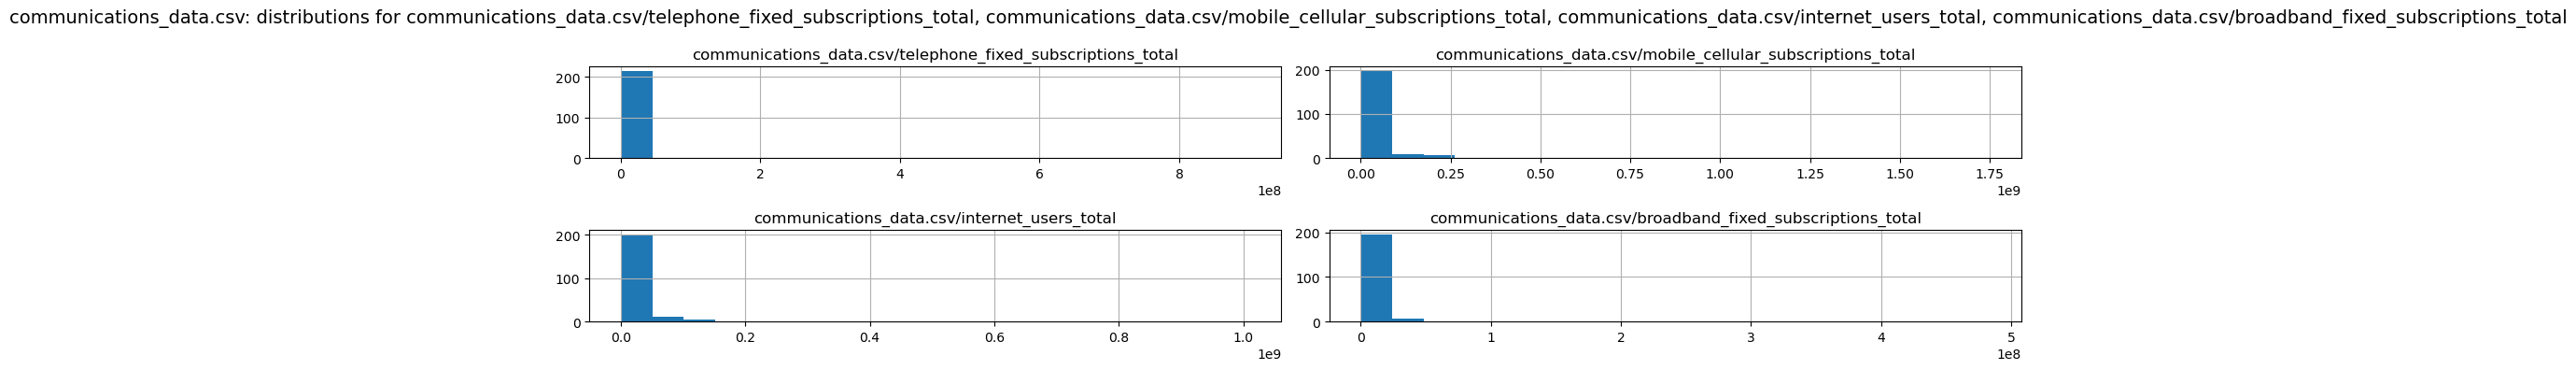

Croissant stream failed for demographics_data.csv (reason: An error occured during the streaming generation of the dataset, more specifically during the operation Read(demographics_data.csv_fileobject)). Using pandas.read_csv instead.


GenerationError: An error occured during the streaming generation of the dataset, more specifically during the operation Read(demographics_data.csv_fileobject)

In [12]:
for record_id in record_set_ids:
    df = record_to_dataframe(croissant_dataset, record_id)
    show_dataframe_summary(df, title=record_id)
